In [3]:
from kan import *
import torch
import matplotlib.pyplot as plt
from torch import autograd
from tqdm import tqdm
from pyscf import gto, scf

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)

cpu
checkpoint directory created: ./model
saving model version 0.0
Dataset shapes: torch.Size([1000, 15]) torch.Size([1000, 1])
saving model version 0.1
saving model version 0.2
saving model version 0.3
saving model version 0.4


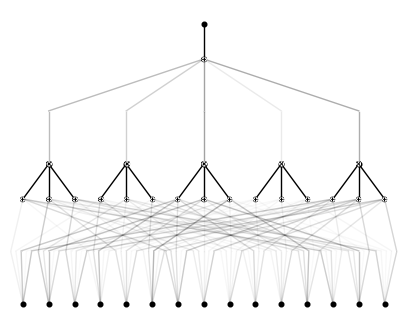

In [2]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

NUM_ELECTRONS = 5
INPUT_DIM = NUM_ELECTRONS * 3
OUTPUT_DIM = NUM_ELECTRONS


# Create MultKAN model with specified widths
# Create the initial MultKAN model
model = MultKAN(width=[INPUT_DIM, [0, OUTPUT_DIM], 1], grid=5, k=2, seed=42, mult_arity=3)

# Create dataset
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=INPUT_DIM)
print("Dataset shapes:", dataset['train_input'].shape, dataset['train_label'].shape)

def chain_str(in_out_dim: int, num_electrons: int) -> str:
    connection_idxs = list(range(in_out_dim))

    # Get first, second, and third third of input indices
    radial_indices = connection_idxs[0::3]
    theta_indices = connection_idxs[1::3]
    phi_indices = connection_idxs[2::3]

    # Get output indices with remainders 0, 1, and 2 when divided by 3
    radial_electrons = [i for i in range(in_out_dim) if i % 3 == 0]
    theta_electrons = [i for i in range(in_out_dim) if i % 3 == 1]
    phi_electrons = [i for i in range(in_out_dim) if i % 3 == 2]

    # Create three chains
    first_chain = f'{radial_electrons}->{radial_indices}'
    second_chain = f'{theta_electrons}->{theta_indices}'
    third_chain = f'{phi_electrons}->{phi_indices}'

    return [first_chain, second_chain, third_chain]

chains = chain_str(INPUT_DIM, NUM_ELECTRONS)

# Set up all connections
for chain in chains:
    model.module(0, chain)
       
# # Create chain for final layer where all intermediate nodes connect to output
final_indices = list(range(OUTPUT_DIM))
final_chain = f'{final_indices}->[0]'
model.module(1, final_chain)

model(dataset['train_input'])
model.plot(beta=1)

In [ ]:
# DONE! Input for nuclear positions - From FermiNet configs DONE!

# Input of number of electrons - pyscf
# Build network - number of electrons, 1d functions, spin interation/feature
# Initialize functions considering nuclear and electronic info...
# Loss function for electronic structure, i.e. Schrodinger Equation
# VMC/MCMC for sampling functions and updating parameters through loss function evaluation/expectation value
# Update positions and functions

In [ ]:
# Create H2 molecule
mol = gto.M(
   atom = '''
   H 0 0 0
   H 0 0 0.737164  # Typical H-H bond length in Angstroms
   ''',
   basis = 'sto-3g',
   spin = 0
)

# Total number of electrons
total_electrons = mol.nelectron
print(f"Total electrons: {total_electrons}")

# Number of electrons per atom
nuclear_charges = mol.atom_charges()
atoms = [atom[0] for atom in mol.atom]  # Get atom symbols from mol.atom

for atom, Z in zip(atoms, nuclear_charges):
   print(f"{atom} has {Z} protons/electrons")

# For spin up/down electrons
mf = scf.RHF(mol)
mf.kernel()

# For restricted calculations (RHF):
n_alpha = mol.nelectron // 2  # Number of alpha (up) electrons
n_beta = mol.nelectron // 2   # Number of beta (down) electrons
print(f"Alpha (up) electrons: {n_alpha}")
print(f"Beta (down) electrons: {n_beta}")

Total electrons: 2

 has 1 protons/electrons
  has 1 protons/electrons
converged SCF energy = -1.11675930739643
Alpha (up) electrons: 1
Beta (down) electrons: 1
